In [ ]:
# Add gis packages to colab environment
!pip install geopandas
!apt-get install -y libspatialindex-dev
!pip install rtree

# Then import packages
import pandas as pd  # provides interface for interacting with tabular data
import geopandas as gpd  # combines the capabilities of pandas and shapely for geospatial operations
from shapely.geometry import Point, Polygon, MultiPolygon  # for manipulating text data into geospatial shapes
from shapely import wkt  # stands for "well known text," allows for interchange across GIS programs
import rtree  # supports geospatial join

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') # connects Colab to your Google Drive
root_path = 'gdrive/My Drive/GIS/' # set root path to folder where you uploaded the data

In [5]:
# Read in PUDs file as a geodataframe and initialize coordinate reference system (CRS)
puds = gpd.read_file(root_path+'input/Planned_Unit_Development__PUDs.shp', crs = {'init' :'epsg:4326'})
aff = pd.read_csv(root_path+'input/Affordable_Housing.csv')
crosswalk = pd.read_csv(root_path+'input/zoning_crosswalk.csv')

In [ ]:
puds.sample(3)

In [ ]:
aff.info()

In [ ]:
puds.info()

In [ ]:
# Create a geometry column in the affordable housing dataframe
aff['geometry'] = aff.apply(lambda row: Point(row.X, row.Y), axis=1)
aff = gpd.GeoDataFrame(aff, crs={'init' :'epsg:4326'})

In [ ]:
aff.sample(1) #sampling to the first index... or column headers and one row.

In [ ]:
# Use geospatial join to identify which PUDs include affordable housing projects
puds_aff = gpd.sjoin(puds, aff, op='intersects', how='left')

In [ ]:
# Check our Merge - incremental development, we're checking as we go!
puds_aff.info()

In [14]:
# Merge dataframe with zoning categories crosswalk
puds_info = puds_aff.merge(crosswalk[['Zone_Cat']], how='left', left_on='PUD_ZONING', right_on=crosswalk['Zone'])

In [ ]:
# Quick count using print statements to show us how many PUDs there are total, and how many offer affordable housing.

print(f"Total count of PUDs: {puds_info.shape[0]}")
print(f"Count PUDs offering Affordable Housing: {puds_info.loc[~puds_info.PROJECT_NAME.isna()].shape[0]}")

In [ ]:
# Create a map of PUDs by Zoning Category
puds_info.plot(column='Zone_Cat', legend=True, figsize=(16,8));

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:642: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


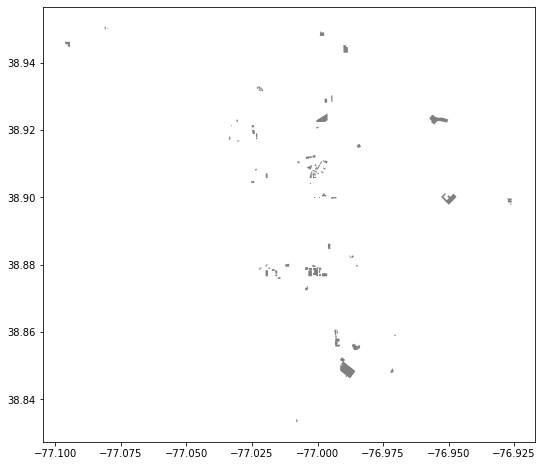

In [17]:
# Create a map of just the PUDs that provide Affordable Housing
puds_info[puds_info['TOTAL_AFFORDABLE_UNITS']>0].plot(column='TOTAL_AFFORDABLE_UNITS', color='grey', figsize=(16,8));

In [19]:
# Export geodataframe as shapefile within Colab environment
puds_info.to_file('puds_info.shp')

# Copy shapefile components from Colab environment to Google Drive using bash script
!cp puds_info.cpg 'gdrive/My Drive/GIS/output'
!cp puds_info.dbf 'gdrive/My Drive/GIS/output'
!cp puds_info.prj 'gdrive/My Drive/GIS/output'
!cp puds_info.shp 'gdrive/My Drive/GIS/output'
!cp puds_info.shx 'gdrive/My Drive/GIS/output'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  
